In [1]:
import sys
sys.path.insert(1, '/home/zhouc1/notebooks/definexpfam/')

In [2]:
import os
from copy import deepcopy
import numpy as np
import pandas as pd
from data_median_dist import *
from base_density import *
from basis_function import *

from scorematching_finexpfam import *
from evaluate_scorematching_loss import *
from negloglik_finexpfam import *
from unnormalized_density import *
from plot_density_1d import *

import scipy 

from datetime import datetime 

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib.gridspec as gridspec

In [ ]:
# # os.chdir('/Users/chenxizhou/Dropbox/Research_Density_Estimation/data_analysis/old_faithful_geyser')
# os.chdir('/home/zhouc1/notebooks/definexpfam_results/geyser_eruptions')
# true_data = np.load('geyser.npy').astype(np.float64)

# # ------------------------------------------------------------------------
# # # original data
# data_eruptions = deepcopy(true_data[:, 1]).reshape(-1, 1)

# # ------------------------------------------------------------------------
# # # shift 0.8333333 to different locations
# # data_eruptions[data_eruptions == 0.8333333] = 1.379

# # ------------------------------------------------------------------------
# # add an data point 
# data_eruptions = np.vstack([data_eruptions, np.array([0.4])])

# # ------------------------------------------------------------------------
# # # create an isolated obs in the middle 
# # split_pt = np.median(waiting.flatten())
# # add_value = 20. 
# # waiting[waiting <= split_pt] = waiting[waiting <= split_pt] - add_value
# # waiting[waiting > split_pt] = waiting[waiting > split_pt] + add_value
# # waiting = np.vstack([waiting.reshape(-1, 1), np.array([split_pt])])
# # waiting = waiting[waiting != 108. + add_value].reshape(-1, 1)

# # landmarks = data_eruptions
# landmarks = np.unique(true_data[:, 1]).reshape(-1, 1)
# # landmarks = np.linspace(0.1, 6.9, 20) 

# xlimit = (0., 7.) 
# ylimit = (-0.005, 0.97) 

In [367]:
# os.chdir('/Users/chenxizhou/Dropbox/Research_Density_Estimation/data_analysis/old_faithful_geyser')
os.chdir('/home/zhouc1/notebooks/definexpfam_results/geyser_waiting')
true_data = np.load('geyser.npy').astype(np.float64)

# ------------------------------------------------------------------------
# # original data
data_waiting = deepcopy(true_data[:, 0]).reshape(-1, 1)

# # ------------------------------------------------------------------------
# # remove 108 
# data_waiting = data_waiting[data_waiting != 108.].reshape(-1, 1)

# ------------------------------------------------------------------------
# # flip the data
# waiting = (2 * np.median(waiting) - waiting).reshape(-1, 1)

# # ------------------------------------------------------------------------
# # shift 108 to different locations
# data_waiting[data_waiting == 108.] = 135.

# ------------------------------------------------------------------------
# add an data point 
add_pt = 103.5
data_waiting = np.vstack([data_waiting, np.array([add_pt]).reshape(-1, 1)])

# ------------------------------------------------------------------------
# # create an isolated obs in the middle 
# split_pt = np.median(waiting.flatten())
# add_value = 20. 
# waiting[waiting <= split_pt] = waiting[waiting <= split_pt] - add_value
# waiting[waiting > split_pt] = waiting[waiting > split_pt] + add_value
# waiting = np.vstack([waiting.reshape(-1, 1), np.array([split_pt])])
# waiting = waiting[waiting != 108. + add_value].reshape(-1, 1)

landmarks = data_waiting
# landmarks = np.unique(data_waiting).reshape(-1, 1)
# landmarks = np.unique(true_data[:, 0]).reshape(-1, 1)
# landmarks = np.linspace(40., 100., 21).reshape(-1, 1) # np.linspace(0.1, 6.9, 10).reshape(-1, 1)

xlimit = (21., 124.)
ylimit = (-0.005, 0.0701)

In [368]:
pd.Series(data_waiting.flatten()).describe()
# pd.Series(data_eruptions.flatten()).describe()

count    300.000000
mean      72.418333
std       13.983477
min       43.000000
25%       59.000000
50%       76.000000
75%       83.000000
max      108.000000
dtype: float64

In [319]:
np.sort(landmarks.flatten())
# np.unique(data_waiting.flatten())

array([ 43. ,  45. ,  47. ,  47. ,  48. ,  48. ,  48. ,  48. ,  48. ,
        49. ,  49. ,  49. ,  49. ,  49. ,  49. ,  49. ,  50. ,  50. ,
        50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,  50. ,
        50. ,  51. ,  51. ,  51. ,  51. ,  51. ,  52. ,  52. ,  52. ,
        52. ,  52. ,  53. ,  53. ,  53. ,  53. ,  53. ,  53. ,  53. ,
        54. ,  54. ,  54. ,  54. ,  54. ,  54. ,  54. ,  54. ,  54. ,
        55. ,  55. ,  55. ,  56. ,  56. ,  57. ,  57. ,  57. ,  57. ,
        57. ,  57. ,  57. ,  57. ,  57. ,  58. ,  58. ,  58. ,  58. ,
        58. ,  59. ,  59. ,  59. ,  60. ,  60. ,  60. ,  60. ,  60. ,
        60. ,  61. ,  61. ,  61. ,  62. ,  62. ,  62. ,  62. ,  62. ,
        63. ,  64. ,  65. ,  65. ,  65. ,  65. ,  65. ,  65. ,  65. ,
        66. ,  66. ,  68. ,  68. ,  68. ,  69. ,  69. ,  69. ,  69. ,
        70. ,  71. ,  71. ,  71. ,  71. ,  71. ,  72. ,  72. ,  72. ,
        72. ,  72. ,  72. ,  73. ,  73. ,  73. ,  73. ,  73. ,  73. ,
        74. ,  74. ,

In [ ]:
# xlimit = xlimit # perturb 115 # (35., 115.) # (41., 115.) # flip 
# ylimit = ylimit
# var_name = 'eruptions'
# # use Freedman-Diaconis rule to determine the binwidth 
# ax = pd.Series(data_eruptions.flatten()).hist(grid = False, figsize = (10, 10), bins = 'fd', density = True) 
# ax.set_ylim(ylimit)
# ax.set_xlim(xlimit)
# ax.set_xlabel(var_name)
# ax.figure.savefig('hist_eruptions.pdf')

In [ ]:
med_dist = data_median_dist(data_waiting.reshape(-1, 1))
med_dist

In [369]:
bw = 10.0
basis_function = GaussianBasisFunction(
    landmarks = landmarks, 
    bw = bw)
base_density = BasedenGamma(data_waiting, 25.221160023271004, 2.8672107549446633)
# waiting base_density.a, base_density.scale # (25.221160023271004, 2.8672107549446633)
# eruptions base_density.a, base_density.scale # (7.601343280497627, 0.45528976884425715)

In [370]:
coef_sm = scorematching_finexpfam_coef(
    data = data_waiting, 
    basis_function = basis_function, 
    base_density = base_density)

In [371]:
file_name = f'add{add_pt}_coef_scorematching_bw={basis_function.bw}_all.npy'
# np.save(f'basisfunction_outlier_interaction/{basis_function.basisfunction_name}_basis_function/' + file_name, 
#        coef_sm)
np.save(f'low_density_region/{basis_function.basisfunction_name}_basis_function/' + file_name, 
       coef_sm)

In [372]:
plot_domain = xlimit
plot_pts_cnt = 4000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)

basis_mat = basis_function.basisfunction_eval(x0)
y0 = np.matmul(basis_mat.T, coef_sm).flatten()
mu = base_density.baseden_eval(x0).flatten()

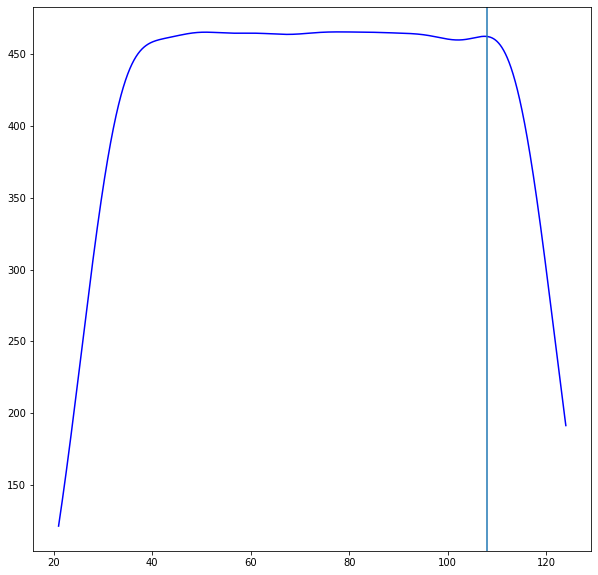

In [373]:
plt.figure(figsize=(10, 10))
plt.plot(x0, np.log(mu) + y0, 'b-')
plt.axvline(np.max(data_waiting), 0, 1)
# plt.axvline(110, 0, 1)
# plt.ylim((35000, 37000))

In [374]:
np.max(np.log(mu) + y0)

465.46969742270215

In [375]:
# evaluate_scorematching_loss(data_eruptions, basis_function, base_density, coef_sm)

In [376]:
sub_const = 300.
def density_eval_1d_cus(basis_function, base_density, coef):

    landmarks = basis_function.landmarks
    n_obs = landmarks.shape[0]
    
    def den(x): 

        den_val = (base_density.baseden_eval_1d(x) * 
                   np.exp(- sub_const + np.sum([coef[i] * basis_function.basis_x_1d(landmarks[i])(x)
                          for i in range(n_obs)])))
        
        return den_val

    return den

In [377]:
int_result, _ = scipy.integrate.quad(
    density_eval_1d_cus(
        basis_function = basis_function, 
        base_density = base_density, 
        coef = coef_sm), 
    a = 0., 
    b = np.inf, 
    limit = 1000)
int_result

1.9473054930804187e+73

(array([0.00820513, 0.02102564, 0.01692308, 0.00717949, 0.02      ,
        0.03641026, 0.02974359, 0.01179487, 0.00153846, 0.00102564]),
 array([ 43. ,  49.5,  56. ,  62.5,  69. ,  75.5,  82. ,  88.5,  95. ,
        101.5, 108. ]),
 <a list of 10 Patch objects>)

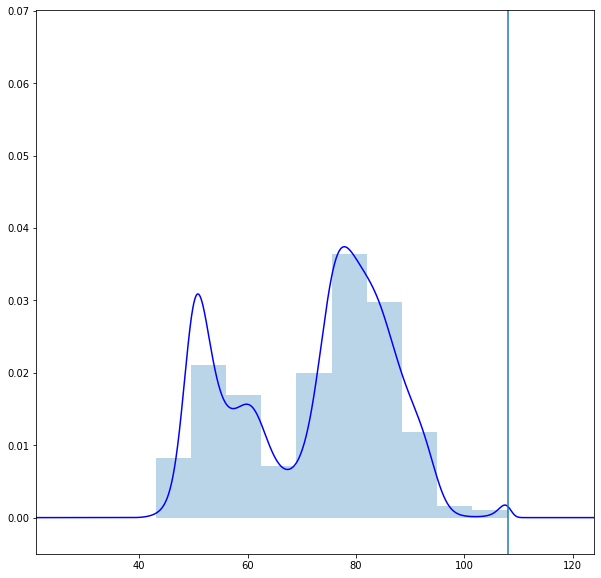

In [378]:
den_vals = mu * np.exp(y0 - sub_const) / int_result 
plt.figure(figsize = (10, 10))
plt.plot(x0, den_vals, 'b-')
plt.xlim(plot_domain) # xlimit)
# plt.ylim((-0.01, 20))
plt.ylim(ylimit)
# plt.axvline(np.min(data_eruptions), 0, 1)

# plt.axvline(103., 0, 1)
plt.axvline(np.max(data_waiting), 0, 1)
plt.hist(data_waiting.flatten(), density = True, bins = 'fd', alpha = 0.3)

In [379]:
file_name = f'add{add_pt}_denvals_scorematching_bw={basis_function.bw}_all.npy'
# np.save(f'basisfunction_outlier_interaction/{basis_function.basisfunction_name}_basis_function/' + file_name, 
#        den_vals)
np.save(f'low_density_region/{basis_function.basisfunction_name}_basis_function/' + file_name, 
        den_vals)

(array([0.00820513, 0.02102564, 0.01692308, 0.00717949, 0.02      ,
        0.03641026, 0.02974359, 0.01179487, 0.00153846, 0.00102564]),
 array([ 43. ,  49.5,  56. ,  62.5,  69. ,  75.5,  82. ,  88.5,  95. ,
        101.5, 108. ]),
 <a list of 10 Patch objects>)

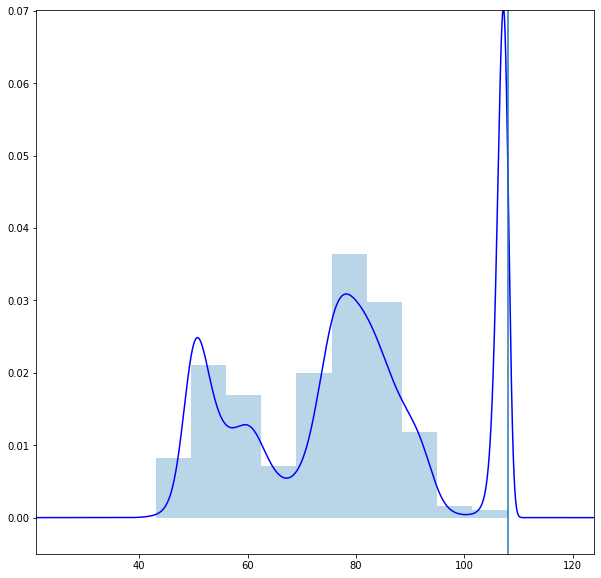

In [176]:
file_name = f'add{106}_denvals_scorematching_bw={basis_function.bw}_all.npy'

plt.figure(figsize = (10, 10))
plt.plot(x0, 
         np.load(f'low_density_region/{basis_function.basisfunction_name}_basis_function/' + file_name), 'b-')
plt.xlim(plot_domain) # xlimit)
# plt.ylim((-0.01, 20))
plt.ylim(ylimit)
# plt.axvline(np.min(data_eruptions), 0, 1)

# plt.axvline(103., 0, 1)
plt.axvline(np.max(data_waiting), 0, 1)
plt.hist(data_waiting.flatten(), density = True, bins = 'fd', alpha = 0.3)

In [ ]:
outlier_list = np.linspace(98., 140., 42 * 2 + 1)
outlier_list

In [ ]:
outlier_list = np.linspace(1345., 1355., 11) / 10
outlier_list

In [ ]:
# outlier_list_bw6 = np.sort(np.unique(outlier_list_bw10))
np.save(f'basisfunction_outlier_interaction/Gaussian_basis_function_bw=4.0/outlier_list_bw=4.0.npy', 
       outlier_list)

In [ ]:
outlier_list = [120.0]

In [ ]:
plot_domain = (21., 155.)
plot_pts_cnt = 4000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)
landmarks_grid = np.linspace(40., 100., 21).reshape(-1, 1)

os.chdir('/home/zhouc1/notebooks/definexpfam_results/geyser_waiting')
true_data = np.load('geyser.npy').astype(np.float64)

bw = 8.0

for i in range(len(outlier_list)): 
    print('*' * 50)
    
    outlier = outlier_list[i]
    print(f'i = {i}, outlier = {outlier}')
    
    data_waiting = deepcopy(true_data[:, 0]) # .reshape(-1, 1)
    data_waiting[data_waiting == 108.] = outlier
    #print(f'max = {np.max(data_waiting)}')
    data_waiting = data_waiting.reshape(-1, 1)
    # print(pd.Series(data_waiting.flatten()).describe())
    
    base_density = BasedenGamma(data_waiting, 25.221160023271004, 2.8672107549446633)
    basis_function_grid = GaussianBasisFunction(
        landmarks = landmarks_grid, # data_eruptions, 
        bw = bw)
    
    coef_sm_grid = scorematching_finexpfam_coef(
        data = data_waiting, 
        basis_function = basis_function_grid, 
        base_density = base_density)
    
    fig = plt.figure(constrained_layout=False)

    fig.set_figheight(5)
    fig.set_figwidth(10)
    ncols = 2
    nrows = 1
    linewidth = 2.0

    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

    ax = fig.add_subplot(spec[0, 0])
    
    basis_mat_grid = basis_function_grid.basisfunction_eval(x0)
    mu = base_density.baseden_eval(x0).flatten()
    y0_grid = np.matmul(basis_mat_grid.T, coef_sm_grid).flatten()
    denvals_grid = np.log(mu) + y0_grid
    
    ax.plot(x0, denvals_grid, 'b-')
    ax.axvline(outlier, 0, 1)
    
#     file_name = f'add{np.max(data_waiting)}_logdenvals_scorematching_bw={basis_function_grid.bw}_40_100_21.npy'
#     np.save(f'basisfunction_outlier_interaction/{basis_function_grid.basisfunction_name}_basis_function_bw={bw}/' + file_name, 
#        denvals_grid)
    
    # basis function at each data point -----------------------
    landmarks_data = data_waiting
    #print(pd.Series(landmarks_data.flatten()).describe())
    basis_function_data = GaussianBasisFunction(
        landmarks = landmarks_data, 
        bw = bw)
    
    coef_sm_data = scorematching_finexpfam_coef(
        data = data_waiting, 
        basis_function = basis_function_data, 
        base_density = base_density)
    
    basis_mat_data = basis_function_data.basisfunction_eval(x0)
    mu = base_density.baseden_eval(x0).flatten()
    y0_data = np.matmul(basis_mat_data.T, coef_sm_data).flatten()
    denvals_data = np.log(mu) + y0_data
    
#     file_name = f'add{np.max(data_waiting)}_logdenvals_scorematching_bw={basis_function_data.bw}_data.npy'
#     np.save(f'basisfunction_outlier_interaction/{basis_function_data.basisfunction_name}_basis_function_bw={bw}/' + file_name, 
#        denvals_data)
    
    ax = fig.add_subplot(spec[0, 1])
    ax.plot(x0, denvals_data, 'b-')
    ax.axvline(outlier, 0, 1)
    plt.show()
    

In [ ]:
plot_domain = (21., 155.)
plot_pts_cnt = 4000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)
landmarks_grid = np.linspace(40., 100., 21).reshape(-1, 1)

os.chdir('/home/zhouc1/notebooks/definexpfam_results/geyser_waiting')
true_data = np.load('geyser.npy').astype(np.float64)

bw = 10.0

for i in range(len(outlier_list)): 
    print('*' * 50)
    
    outlier = outlier_list[i]
    print(f'i = {i}, outlier = {outlier}')
    
    data_waiting = deepcopy(true_data[:, 0]) # .reshape(-1, 1)
    data_waiting[data_waiting == 108.] = outlier
    #print(f'max = {np.max(data_waiting)}')
    data_waiting = data_waiting.reshape(-1, 1)
    # print(pd.Series(data_waiting.flatten()).describe())
    
    base_density = BasedenGamma(data_waiting, 25.221160023271004, 2.8672107549446633)
    basis_function_grid = GaussianBasisFunction(
        landmarks = landmarks_grid, # data_eruptions, 
        bw = bw)
    
    coef_sm_grid = scorematching_finexpfam_coef(
        data = data_waiting, 
        basis_function = basis_function_grid, 
        base_density = base_density)
    
    fig = plt.figure(constrained_layout=False)

    fig.set_figheight(5)
    fig.set_figwidth(10)
    ncols = 2
    nrows = 1
    linewidth = 2.0

    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

    ax = fig.add_subplot(spec[0, 0])
    
    basis_mat_grid = basis_function_grid.basisfunction_eval(x0)
    mu = base_density.baseden_eval(x0).flatten()
    y0_grid = np.matmul(basis_mat_grid.T, coef_sm_grid).flatten()
    denvals_grid = np.log(mu) + y0_grid
    
    ax.plot(x0, denvals_grid, 'b-')
    ax.axvline(outlier, 0, 1)
    
#     file_name = f'add{np.max(data_waiting)}_logdenvals_scorematching_bw={basis_function_grid.bw}_40_100_21.npy'
#     np.save(f'basisfunction_outlier_interaction/{basis_function_grid.basisfunction_name}_basis_function_bw={bw}/' + file_name, 
#        denvals_grid)
    
    # basis function at each data point -----------------------
    landmarks_data = data_waiting
    #print(pd.Series(landmarks_data.flatten()).describe())
    basis_function_data = GaussianBasisFunction(
        landmarks = landmarks_data, 
        bw = bw)
    
    coef_sm_data = scorematching_finexpfam_coef(
        data = data_waiting, 
        basis_function = basis_function_data, 
        base_density = base_density)
    
    basis_mat_data = basis_function_data.basisfunction_eval(x0)
    mu = base_density.baseden_eval(x0).flatten()
    y0_data = np.matmul(basis_mat_data.T, coef_sm_data).flatten()
    denvals_data = np.log(mu) + y0_data
    
#     file_name = f'add{np.max(data_waiting)}_logdenvals_scorematching_bw={basis_function_data.bw}_data.npy'
#     np.save(f'basisfunction_outlier_interaction/{basis_function_data.basisfunction_name}_basis_function_bw={bw}/' + file_name, 
#        denvals_data)
    
    ax = fig.add_subplot(spec[0, 1])
    ax.plot(x0, denvals_data, 'b-')
    ax.axvline(outlier, 0, 1)
    plt.show()
    

In [ ]:
outlier_list = np.linspace(98., 150., 500)
# outlier_list = np.arange(98., 125.)

In [ ]:
loss_list = []
loss_list_outlier = []

In [ ]:
plot_domain = xlimit
plot_pts_cnt = 4000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)

bw = 8.

# for i in range(len(bw_list)): 
for i in range(len(outlier_list)): 
    if i % 100 == 0: 
        print('*' * 50)
    # bw = bw_list[i]
    # print(f'i = {i}, bw = {bw}')
    
    outlier = outlier_list[i]
    if i % 100 == 0: 
        print(f'i = {i}, outlier = {outlier}')
    
    data_waiting = deepcopy(true_data[:, 0]) # .reshape(-1, 1)
    data_waiting[data_waiting == 108.] = outlier
    if i % 100 == 0: 
        print(f'max = {np.max(data_waiting)}')
    data_waiting = data_waiting.reshape(-1, 1)
    if i % 100 == 0: 
        print(pd.Series(data_waiting.flatten()).describe())
    
    base_density = BasedenGamma(data_waiting, 25.221160023271004, 2.8672107549446633)
    basis_function = GaussianBasisFunction(
        landmarks = landmarks, # data_eruptions, 
        bw = bw)
    
    coef_sm = scorematching_finexpfam_coef(
        data = data_waiting, # data_eruptions, # , # 
        basis_function = basis_function, 
        base_density = base_density)
    
#     basis_mat = basis_function.basisfunction_eval(x0)
#     mu = base_density.baseden_eval(x0).flatten()
#     y0 = np.matmul(basis_mat.T, coef_sm).flatten()
#     plt.figure(figsize=(5, 5))
#     plt.plot(x0, np.log(mu) + y0, 'b-')
#     # plt.vlines(outlier, 0, 1)
#     plt.show()
    
    smloss = evaluate_scorematching_loss(data_waiting, basis_function, base_density, coef_sm)
    loss_list.append(smloss)
    # print(f'Score Matching Loss = {smloss[2]:.5f}, Squared deriv1 = {smloss[0]:.5f}, deriv2 = {smloss[1]:.5f}.')
    
    N, d = 1, 1
    n_basis = basis_function.landmarks.shape[0]
    
    DT = basis_function.basisfunction_deriv1(np.array([[outlier]]))
    dt_prod_term = sum([np.matmul(DT[:, i].reshape(n_basis, d),
                                  DT[:, i].reshape(n_basis, d).T) for i in range(N)])

    # compute DT and grad of log mu
    # compute the gradient of log mu at data
    # each row corresponds to one data point
    grad_logmu = np.array([base_density.logbaseden_deriv1(np.array([[outlier]]), j).flatten() for j in range(d)]).T
    dt_baseden_term = sum([np.matmul(DT[:, i].reshape(n_basis, d), grad_logmu[[i]].T) for i in range(N)])

    output1 = 0.5 * np.matmul(coef_sm.T, np.matmul(dt_prod_term, coef_sm))[0][0] + np.sum(coef_sm.flatten() * dt_baseden_term.flatten())
    # np.matmul(coef.T, dt_baseden_term)[0][0]
    
    # second derivative term 
    # compute the matrix G, which involves the second derivative
    matG = basis_function.basisfunction_deriv2(np.array([[outlier]]))
    # print(len(matG))
    sum_matG = np.sum(sum([matG[:, i].reshape(n_basis, d) for i in range(N)]), axis=1, keepdims=True)

    output2 = np.sum(coef_sm.flatten() * sum_matG.flatten())
    # np.matmul(coef.T, sum_matG)[0][0]
    
    loss_list_outlier.append([output1 / len(data_waiting), output2 / len(data_waiting), (output1 + output2) / len(data_waiting)])
    

In [ ]:
deriv1_part = [item[0] for item in loss_list]
deriv2_part = [item[1] for item in loss_list]
total_part = [item[2] for item in loss_list]

deriv1_part1 = [item[0] for item in loss_list_outlier]
deriv2_part1 = [item[1] for item in loss_list_outlier]
total_part1 = [item[2] for item in loss_list_outlier]

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(outlier_list, deriv1_part1, 'r-', label = '1st derivative part')
plt.plot(outlier_list, deriv2_part1, 'b-', label = '2nd derivative part')
plt.plot(outlier_list, total_part1, 'k-', label = 'score matching loss values')
plt.legend(fontsize = 15)
plt.xlabel('outlier', fontsize = 15)
plt.ylabel('value', fontsize = 15)
plt.tick_params(axis = 'both', labelsize = 15)
# plt.savefig('scorematching_value_outlier_combined.pdf')

In [ ]:
plot_pts_cnt = 4000
newx = np.array(outlier_list)
plot_ylim = (-0.75, 0.41)

fig = plt.figure(constrained_layout=False)

fig.set_figheight(32)
fig.set_figwidth(16)
ncols = 1
nrows = 2
fontsize = 25
linewidth = 2.0

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

ax = fig.add_subplot(spec[0, 0])

ax.plot(newx, deriv1_part, color = 'tab:blue', linewidth = linewidth, label = 'sq 1st derivative part')
ax.plot(newx, deriv2_part, color = 'tab:red', linewidth = linewidth, label = '2nd derivative part')
ax.plot(newx, total_part, color = 'tab:green', linewidth = linewidth, label = 'score matching loss values')
ax.legend(fontsize = fontsize, loc = 'lower left')
ax.set_ylim(plot_ylim)
ax.set_xlabel('location of maximum', fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)

# info = r"Add {out}".format(out = outlier)

# ax.text(0.012, 0.988,
#         info,
#         fontsize = fontsize1,
#         multialignment = 'left',
#         horizontalalignment = 'left',
#         verticalalignment = 'top',
#         transform = ax.transAxes,
#         bbox = {'facecolor': 'none',
#                 'boxstyle': 'Round, pad=0.2'})


ax = fig.add_subplot(spec[1, 0])

ax.plot(newx, deriv1_part1, color = 'tab:blue', linewidth = linewidth, label = 'sq 1st derivative part')
ax.plot(newx, deriv2_part1, color = 'tab:red', linewidth = linewidth, label = '2nd derivative part')
ax.plot(newx, total_part1, color = 'tab:green', linewidth = linewidth, label = 'score matching loss values')
ax.legend(fontsize = fontsize, loc = 'lower left')
ax.set_xlabel('location of maximum', fontsize = fontsize)
ax.set_ylim(plot_ylim)
ax.tick_params(axis = 'both', labelsize = fontsize)

plt.savefig('scorematching_value_outlier_combined_vertical.pdf')

In [ ]:
file_name = f'original_denvals_scorematching_bw={basis_function.bw}_0.1_6.9_20.npy'
np.save(f'{basis_function.basisfunction_name}_basis_function/scorematching/' + file_name, 
        den_vals)

# np.save(f'{basis_function.basisfunction_name}_basis_function/scorematching/' + file_name, 
#         den_vals)

In [ ]:
file_name = f'original_denvals_scorematching_bw=0.3.npy'
yy0 = np.load(f'{basis_function.basisfunction_name}_basis_function/scorematching/' + file_name)

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(x0, yy0/1e105, 'b-')
plt.xlim(xlimit)
plt.ylim(ylimit)
# plt.vlines(x = 75., ymin = -1, ymax = 1)

In [ ]:
file_name = f'original_denvals_scorematching_bw=0.3.npy'
np.save(f'{basis_function.basisfunction_name}_basis_function/scorematching/' + file_name, yy0/1e105)

In [ ]:
batchmc_params = batch_montecarlo_params(
    mc_batch_size = 1000, 
    mc_tol = 1e-2)

nll_algo_params = negloglik_optalgoparams(
    start_pt = np.zeros((data_eruptions.shape[0], 1)), 
    step_size = 0.03, 
    max_iter = 100, 
    rel_tol = 2e-5)

In [ ]:
now1 = datetime.now()

coef_lik = negloglik_finexpfam_coef(
    data = data_eruptions, 
    basis_function = basis_function, 
    base_density = base_density, 
    optalgo_params = nll_algo_params, 
    batchmc_params = batchmc_params,
    batch_mc = True, 
    batch_mc_se = False, 
    print_error = True)
now2 = datetime.now()
print(now1, now2)
print(now2 - now1)

In [ ]:
file_name = f'original_coef_likelihood_bw={basis_function.bw}.npy'
np.save(f'{basis_function.basisfunction_name}_basis_function/likelihood/' + file_name, 
        coef_lik)

In [ ]:
plot_domain = xlimit
plot_pts_cnt = 4000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)

In [ ]:
basis_mat = basis_function.basisfunction_eval(x0)
y0 = np.matmul(basis_mat.T, coef_lik).flatten()
mu = base_density.baseden_eval(x0).flatten()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x0, np.log(mu) + y0, 'b-')
#plt.ylim((4e6, 4.3e6))

In [ ]:
file_name = f'original_coef_likelihood_bw={basis_function.bw}.npy'
coef_lik = np.load(f'{basis_function.basisfunction_name}_basis_function/likelihood/' + file_name)

In [ ]:
unnorm = UnnormalizedDensityFinExpFam(
    data = data_eruptions, 
    basis_function = basis_function, 
    base_density = base_density, 
    coef = coef_lik)

In [ ]:
unnorm_fun = unnorm.density_eval
unnorm_fun_int = unnorm.density_eval_1d
x0_cand = np.linspace(xlimit[0], xlimit[1], num=4000).reshape(-1, 1)
plot_val = unnorm_fun(x0_cand)

In [ ]:
norm_const, _ = integrate.nquad(unnorm_fun_int, base_density.domain, opts={'limit': 100})
norm_const

In [ ]:
file_name = f'original_coef_likelihood_bw=0.4.npy'
coef_lik = np.load(f'{basis_function.basisfunction_name}_basis_function/likelihood/' + file_name)

In [ ]:
plot_params = plot_density_1d_params(x_limit = xlimit, y_limit = ylimit, plot_pts_cnt=4000)

In [ ]:
denvals = plot_density_1d(
    data = data_eruptions, 
    basis_function = basis_function, 
    base_density = base_density, 
    coef = coef_lik, 
    normalizing = True, 
    method = 'likelihood', 
    x_label = 'waiting',
    plot_kwargs = plot_params, 
    save_plot = False, 
    save_dir = None, 
    save_filename = None)

In [ ]:
file_name = f'original_denvals_likelihood_bw={basis_function.bw}.npy'
np.save(f'{basis_function.basisfunction_name}_basis_function/likelihood/' + file_name, 
        denvals['den_vals'])